## Day 14

In [5]:
from AOC2017 import knotHash

def squares(seed):
    square = []
    s = 0
    for n in range(128):
        l = [ ord(c) for c in seed+"-"+str(n) ]
        b = ""
        for i in knotHash(l):
            b += f'{int(i,16):0>4b}'
        square.append(b)
        s += b.count("1")
    return s,square

In [107]:
st,sqt = squares("flqrgnkx")
print("Test 1:",st)

s,sq = squares("wenycdww")
print("Part 1:",s)

Test 1: 8108
Part 1: 8226


In [125]:
import numpy as np

def getMatrix(sq):
    matrix = np.zeros((len(sq),len(sq[0])),dtype=int)
    y = 0
    for r in sq:
        x = 0
        for c in r:
            matrix[x][y] = c
            x += 1
        y += 1
    return matrix

def floodfill(matrix, x, y, value):
    '''recursive implementation of floodfill algorithm, ignoring diagonals'''
    if matrix[x][y] == 1:  
        matrix[x][y] = value 
        if x > 0:
            floodfill(matrix,x-1,y,value)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y,value)
        if y > 0:
            floodfill(matrix,x,y-1,value)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1,value)
            
from copy import deepcopy

def fillMatrix(matrix):
    filled = deepcopy(matrix)
    ifill = 2 
    for y in range(len(filled)):
        for x in range(len(filled[0])):
            if filled[x][y]==1:
                floodfill(filled, x, y, ifill)
                ifill +=1
    return ifill-2,filled

In [126]:
mt = getMatrix(sqt)
nft,ft = fillMatrix(mt)
print("Test 2:",nft)

m  = getMatrix(sq)
nf,f = fillMatrix(m)
print("Part 2:",nf)

Test 2: 1242
Part 2: 1128


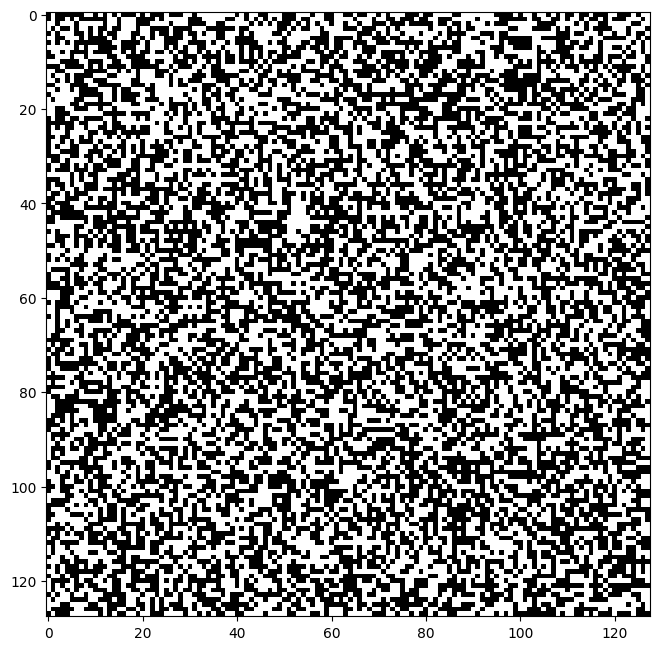

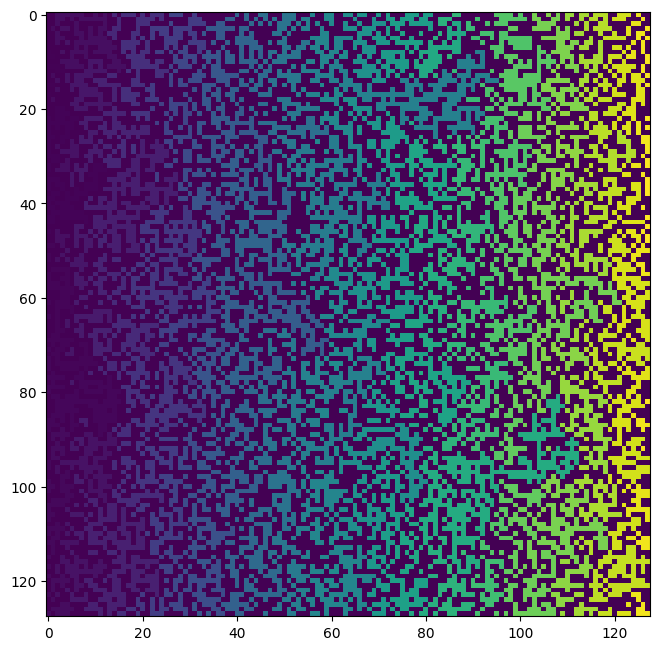

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8),dpi=100)
plt.imshow(m,cmap="binary")

plt.figure(figsize=(8,8),dpi=100)
plt.imshow(f)